In [1]:
from IPython.display import Image
import numpy as np
import os
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
diabetes = pd.read_csv("dataset_diabetes/diabetic_data.csv")
print("Shape of data is " + str(diabetes.shape))

Shape of data is (101766, 50)


In [2]:
diabetes.sample(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
15482,59390178,20173779,Caucasian,Female,[60-70),?,3,18,3,4,?,?,56,2,8,0,0,0,789,599,593,6,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
15375,59066802,1847529,AfricanAmerican,Female,[10-20),?,1,1,7,1,?,Pediatrics-CriticalCare,42,0,3,0,0,1,250.12,276,V15,3,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
95917,368401910,41251329,AfricanAmerican,Female,[60-70),?,3,1,1,13,PO,InternalMedicine,83,1,16,1,2,1,280,578,694,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
97886,393805376,91875564,Caucasian,Female,[60-70),?,3,6,1,9,BC,Hematology,80,3,23,0,0,1,197,197,198,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
50379,151399566,84657348,AfricanAmerican,Female,[70-80),?,1,2,7,2,MC,?,54,0,17,0,0,1,428,397,250.5,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
40533,125845710,103769577,Caucasian,Female,[60-70),?,3,1,1,1,SP,Emergency/Trauma,1,0,15,0,0,0,780,427,V58,6,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
42030,129780168,25047162,Caucasian,Male,[50-60),?,3,1,1,7,BC,Pulmonology,48,6,39,0,0,0,510,511,486,5,None,None,No,No,No,No,No,No,Steady,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
48193,147325458,74811015,AfricanAmerican,Female,[70-80),?,1,1,7,3,?,?,41,1,12,0,0,0,786,403,414,9,None,None,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
6069,30598566,25783884,Caucasian,Male,[80-90),?,5,6,17,2,?,Family/GeneralPractice,21,0,6,0,1,0,250.82,401,V12,3,Norm,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
34743,108402642,24772176,AfricanAmerican,Male,[80-90),?,1,1,7,2,MC,InternalMedicine,42,0,13,0,0,0,428,492,V58,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


Number of missing values in different columns


<AxesSubplot: >

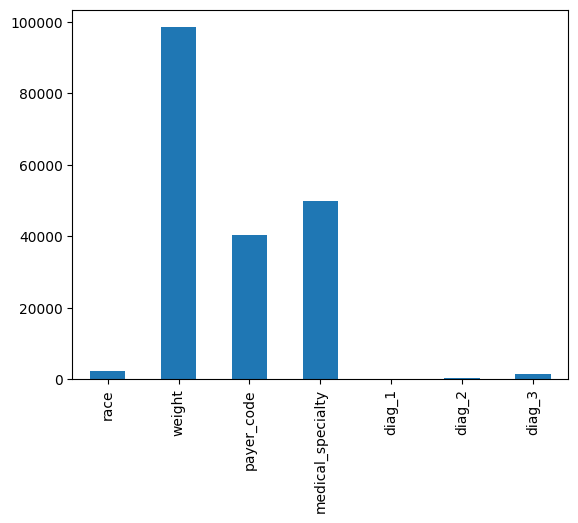

In [3]:
missing_num = np.sum(diabetes == "?",axis =0)
num_diabetes_data_entries = diabetes.shape[0]
print("Number of missing values in different columns")
missing_num[missing_num[:] > 0]
missing_num[missing_num[:] > 0].plot.bar()

<BarContainer object of 3 artists>

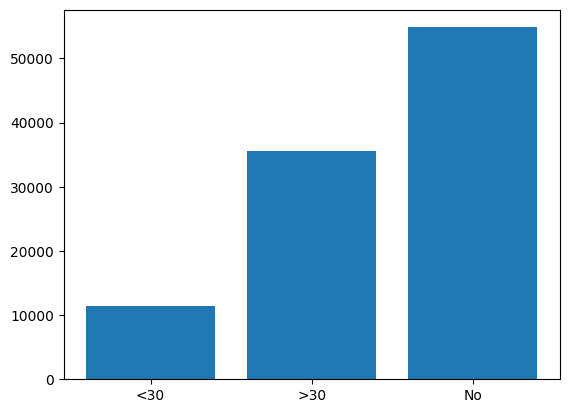

In [4]:
import matplotlib.pyplot as plt
plt.bar(['<30', '>30', 'No'],[np.sum(diabetes['readmitted'] == "<30"),
np.sum(diabetes['readmitted'] == ">30"),
np.sum(diabetes['readmitted'] == "NO")])

In [5]:
#diabetes=diabetes.drop(columns=['weight', 'payer_code','medical_specialty'])

In [6]:
# imputer for filling missing values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = '?', fill_value = np.nan, strategy = 'constant')

In [7]:
# replace ? with NaN
diabetes.replace('?', np.NaN, inplace=True)

In [8]:
diabetes=diabetes.drop(columns=['weight', 'payer_code','medical_specialty'])

In [9]:
# drop rows with missing values
diabetes.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [10]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
# convert string to categorical
diabetes_string_col=['race', 'gender', 'age','max_glu_serum', 
                     'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'diag_1', 'diag_2', 'diag_3',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [12]:
for i in diabetes_string_col:
    diabetes[i]= diabetes[i].astype('category')

In [13]:
diabetes['race']

1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
5               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 98053, dtype: category
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

In [14]:
y = diabetes['readmitted'] 

In [15]:
diabetes
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
diabetes = pd.DataFrame(diabetes)


for i in diabetes_string_col:
    dummies = pd.get_dummies(diabetes[i], prefix=i)
    diabetes = diabetes.join(dummies)
#     enc_df = (enc.fit_transform(diabetes[i].reshape(diabetes[i].shape[0], 1)).toarray())
#     print(enc_df)
for i in diabetes_string_col:
    diabetes = diabetes.drop(i, axis=1)


In [16]:
y=diabetes['readmitted']
x=diabetes.drop(columns=['readmitted','encounter_id','patient_nbr']) # drop the patiant id
import pandas as pd

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
X_train.shape

(78442, 2350)

In [19]:
X_test.shape

(19611, 2350)

## Random Forest

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
test_accuracy = []
training_accuracy = []


clfs = []
depths = [1, 5, 100, 250, 300]
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    training_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))
    
import matplotlib.pyplot as plt


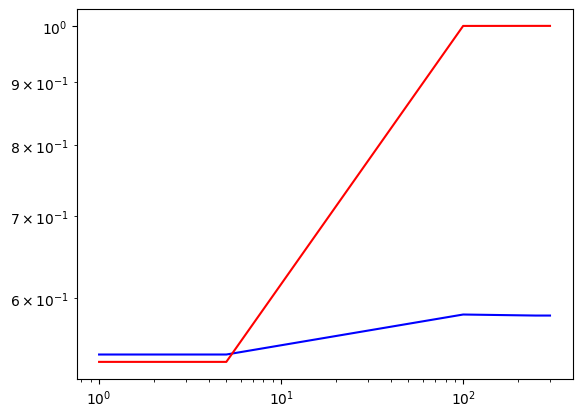

In [21]:
plt.loglog(depths, test_accuracy, c='b')
plt.loglog(depths, training_accuracy, c='r')

Text(0.5, 1.0, 'Most Important Features according to Random Forest')

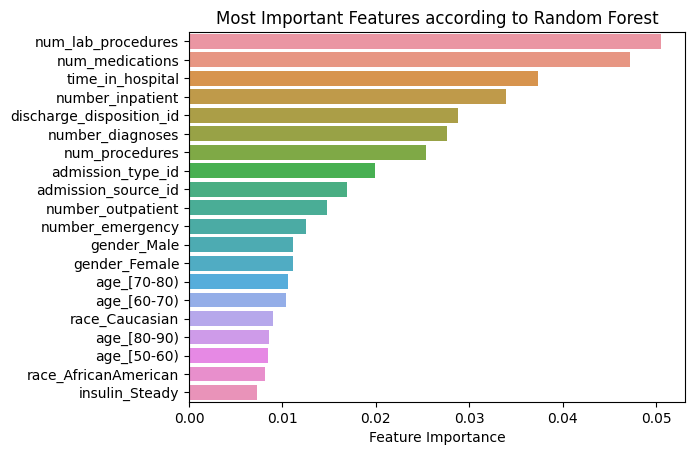

In [22]:
import seaborn as sns
feature_imp = pd.Series(clfs[3].feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:20], y=feature_imp[:20].index)
plt.rcParams["figure.figsize"] = (4,4)
plt.xlabel('Feature Importance')
plt.title('Most Important Features according to Random Forest')

## PCA

In [23]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data = scaler.transform(X_train)
pca = PCA(n_components = 200)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
def scale_pca(data):
    return pca.transform(scaler.transform(data))

## PCA + Random Forest

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
pca_training_accuracy = []
pca_test_accuracy = []

pca_rf_clfs = []
depths = [1, 5, 20, 50, 100, 250, 300]
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(data_pca, y_train)
    pca_rf_clfs.append(clf)
    pca_training_accuracy.append(accuracy_score(y_train, clf.predict(data_pca)))
    pca_test_accuracy.append(accuracy_score(y_test, clf.predict(scale_pca(X_test))))

Random Forest with PCA


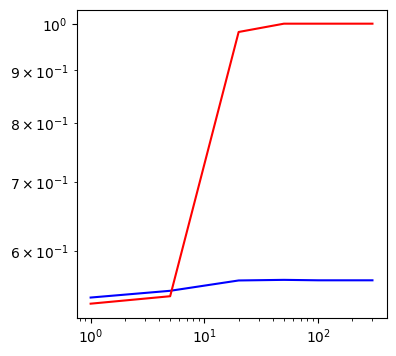

In [28]:
plt.loglog(depths, pca_test_accuracy, c='b')
plt.loglog(depths, pca_training_accuracy, c='r')
print("Random Forest with PCA")

In [29]:
pca_3d = PCA(n_components = 3)
pca_3d.fit(scaled_data)
data_pca_3d = pca_3d.transform(scaled_data)

## Show the PCA in 3D to see if we could visually classify the points

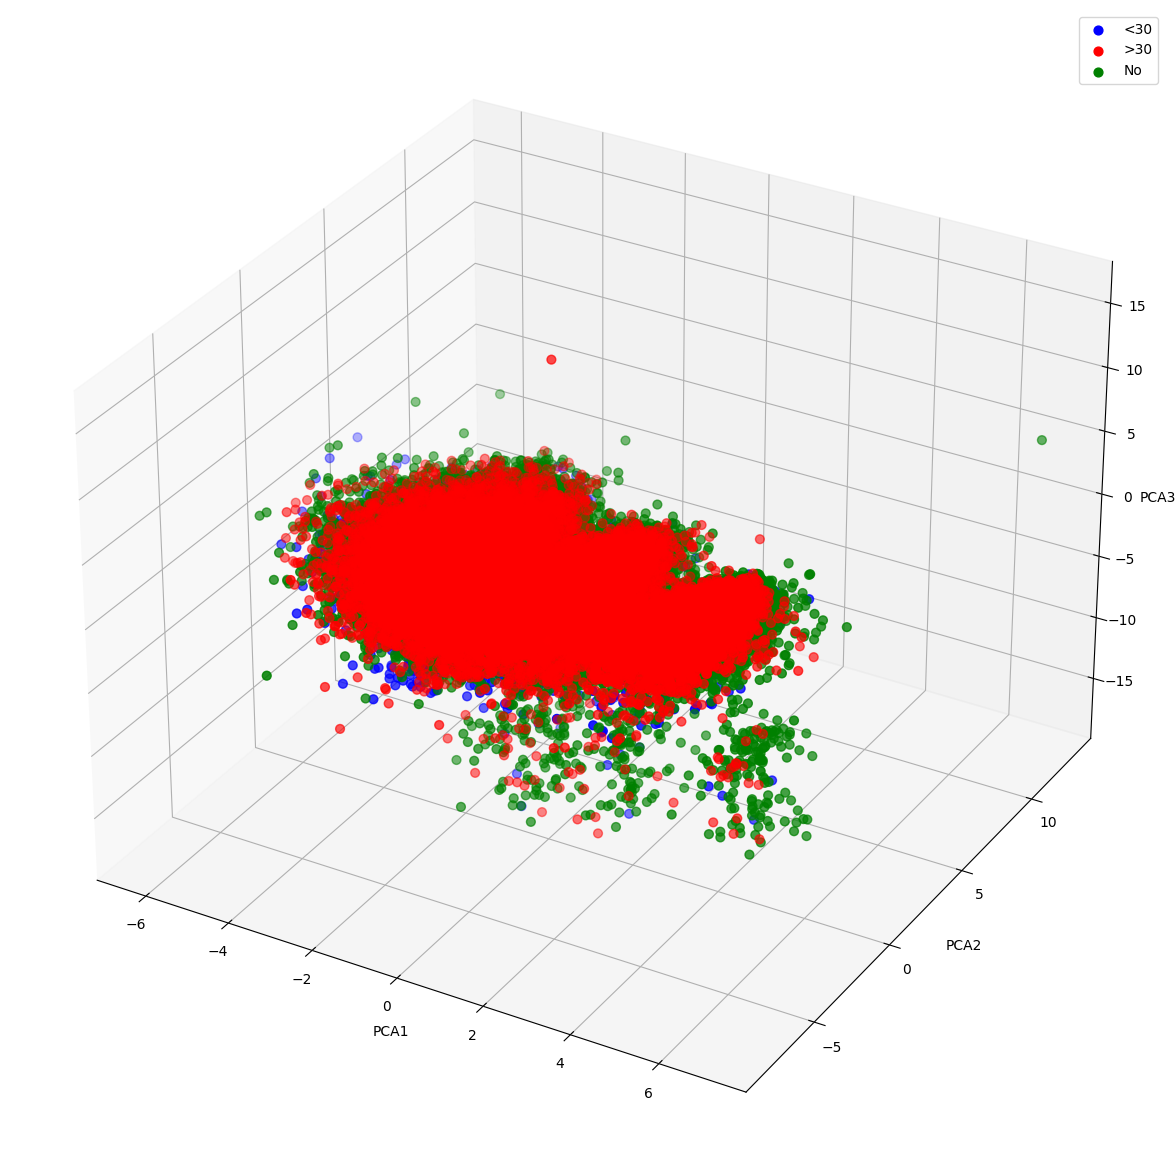

In [30]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca_3d[y_train == '<30'][:,0], data_pca_3d[y_train == '<30'][:,1], data_pca_3d[y_train == '<30'][:,2], s = 40 , color = 'blue', label = "<30")
ax.scatter(data_pca_3d[y_train == '>30'][:,0], data_pca_3d[y_train == '>30'][:,1], data_pca_3d[y_train == '>30'][:,2], s = 40 , color = 'red', label = ">30")
ax.scatter(data_pca_3d[y_train == 'NO'][:,0], data_pca_3d[y_train == 'NO'][:,1], data_pca_3d[y_train == 'NO'][:,2], s = 40 , color = 'g', label = "No")
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()

## Logistic Regression

In [31]:
from sklearn import linear_model
print("Train with PCA")
logr_pca = linear_model.LogisticRegression(solver='liblinear')
logr_pca.fit(data_pca,y_train)

Train with PCA


LogisticRegression(solver='liblinear')

In [32]:
print("Train Accuracy")
print(accuracy_score(y_train, logr_pca.predict(data_pca)))
print("Test Accuracy")
print(accuracy_score(y_test, logr_pca.predict(scale_pca(X_test))))

Train Accuracy
0.5605033018026058
Test Accuracy
0.5650400285554026


In [33]:
from sklearn import linear_model
print("Train with original data")
logr = linear_model.LogisticRegression(solver='liblinear')
logr.fit(X_train,y_train)

Train with original data


LogisticRegression(solver='liblinear')

In [34]:
print("Train Accuracy")
print(accuracy_score(y_train, logr.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, logr.predict(X_test)))

Train Accuracy
0.5856683919328931
Test Accuracy
0.5761562388455459


## Linear SVM

As SVM for original data taking too long to run, we use the 200 features PCA for SVM in the following code.

In [35]:
from sklearn import svm
svm_linear_clf = svm.LinearSVC()
svm_linear_clf.fit(data_pca, y_train)

/Users/hank/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [37]:
print("Train Accuracy")
print(accuracy_score(y_train, svm_linear_clf.predict(data_pca)))
print("Test Accuracy")
print(accuracy_score(y_test, svm_linear_clf.predict(scale_pca(X_test))))

Train Accuracy
0.5579918920986207
Test Accuracy
0.5630003569425323


## Soft Voting Ensemble


In [43]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
v = VotingClassifier(estimators=[('linear_svc', svm_linear_clf), ('logistic-regression', logr_pca), ('gnb', pca_rf_clfs[3])], voting='hard')

In [44]:
v.fit(data_pca, y_train)
print("Train Accuracy")
print(accuracy_score(y_train, v.predict(data_pca)))
print("Test Accuracy")
print(accuracy_score(y_test, v.predict(scale_pca(X_test))))

/Users/hank/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Accuracy
0.5859361056576834
Test Accuracy
0.5672326755392382
